<a href="https://colab.research.google.com/github/deadoralive023/Reinforcement-Learning/blob/main/dynamic_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import gym
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.font_manager
name = 'FrozenLake-v0'
env = gym.make(name, is_slippery = False)

#lets examine it
print('Action Space:      ' + str(env.action_space))
print('Reward Range:      ' + str(env.reward_range))
print('Observation Space: ' + str(env.observation_space))
env.render()



Action Space:      Discrete(4)
Reward Range:      (0, 1)
Observation Space: Discrete(16)

SFFF
FHFH
FFFH
HFFG


In [32]:
def plot(V,policy,col_ramp=1,dpi=175,draw_vals=False):
    plt.rcParams['figure.dpi'] = dpi
    plt.rcParams.update({'axes.edgecolor': (0.32,0.36,0.38)})
    plt.rcParams.update({'font.size': 4 if env.env.nrow == 8 else 7})
    plt.figure(figsize=(3,3))
    plt.imshow(1-V.reshape(env.env.nrow,env.env.ncol)**col_ramp, cmap='gray', interpolation='none', clim=(0,1))
    ax = plt.gca()
    ax.set_xticks(np.arange(env.env.ncol)-.5)
    ax.set_yticks(np.arange(env.env.nrow)-.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    for s in range(env.nS):
        x = s%env.env.nrow
        y = int(s/env.env.ncol)
        a = policy[s]
        gray = np.array((0.32,0.36,0.38))
        if env.desc.tolist()[y][x] == b'G': 
            plt.text(x-0.45,y-0.3, 'goal', color=(0.75,0.22,0.17), fontname='OpenSans', weight='bold')
            continue
        if a[0] > 0.0: plt.arrow(x, y, float(a[0])*-.84, 0.0, color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1) # left
        if a[1] > 0.0: plt.arrow(x, y, 0.0, float(a[1])*.84,  color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1) # down
        if a[2] > 0.0: plt.arrow(x, y, float(a[2])*.84, 0.0,  color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1) # right
        if a[3] > 0.0: plt.arrow(x, y, 0.0, float(a[3])*-.84, color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1) # up
        if env.desc.tolist()[y][x] == b'F': plt.text(x-0.45,y-0.3, 'ice', color=(gray*V[s]), fontname='OpenSans')
        if env.desc.tolist()[y][x] == b'S': plt.text(x-0.45,y-0.3, 'start',color=(0.21,0.51,0.48), fontname='OpenSans', weight='bold')
        if draw_vals and V[s]>0:
            vstr = '{0:.1e}'.format(V[s]) if env.env.nrow == 8 else '{0:.6f}'.format(V[s])
            plt.text(x-0.45,y+0.45, vstr, color=(gray*V[s]), fontname='OpenSans')
    plt.grid(color=(0.42,0.46,0.48), linestyle=':')
    ax.set_axisbelow(True)
    ax.tick_params(color=(0.42,0.46,0.48),which='both',top='off',left='off',right='off',bottom='off')
    plt.show()

In [33]:
def policy_evaluation(env, policy, gamma = 1, theta = 1e-8, draw = True):
  V = np.zeros(env.nS)
  while True:
    delta = 0
    for s in range(env.nS):
      Vs = 0
      for a, action_prob in enumerate(policy[s]):
        for prob, next_state, reward, done in env.P[s][a]:
          Vs += action_prob * prob * (reward + gamma * V[next_state])
      delta = max(delta, np.abs(Vs-V[s]))
      V[s] = Vs
    if draw: plot(V, policy, draw_vals = True)
    if delta < theta:
      break
  return V

In [34]:
policy = np.ones([env.nS, env.nA]) / env.nA

findfont: Font family ['OpenSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['OpenSans'] not found. Falling back to DejaVu Sans.


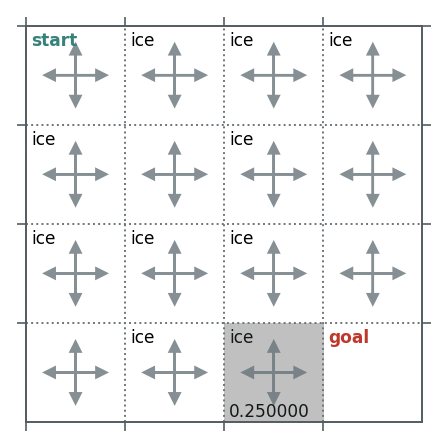

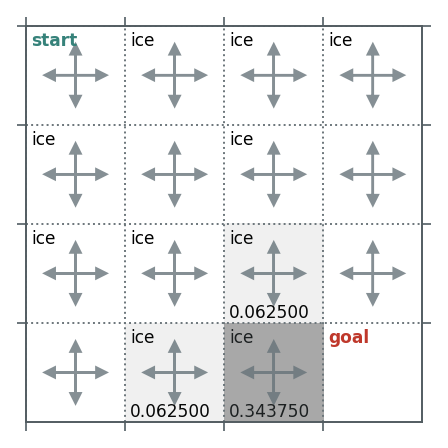

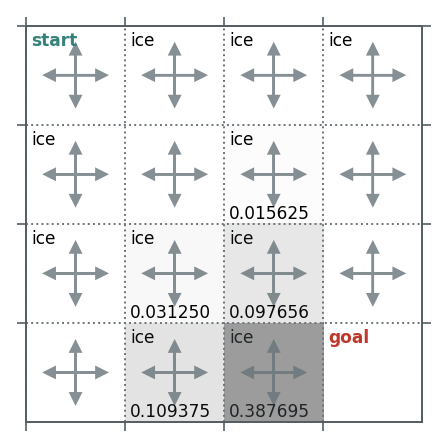

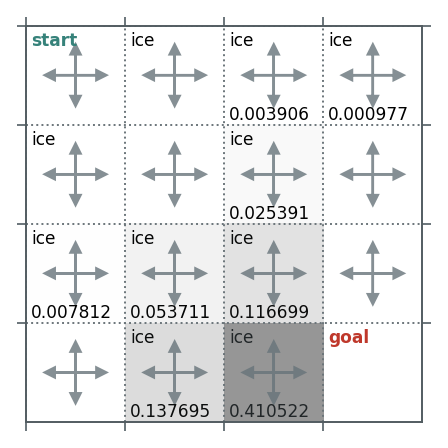

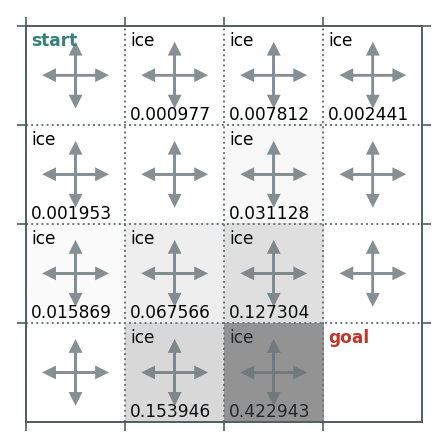

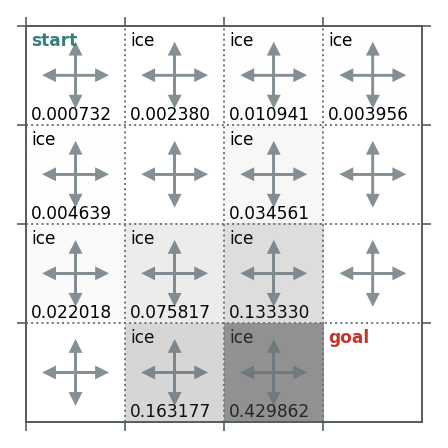

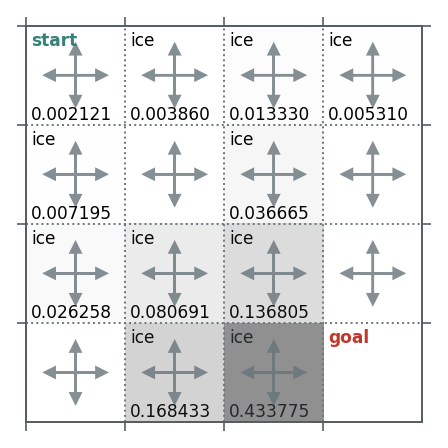

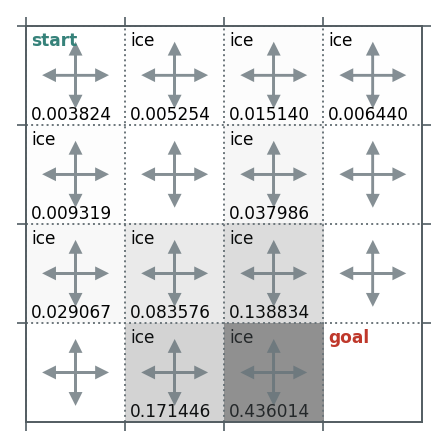

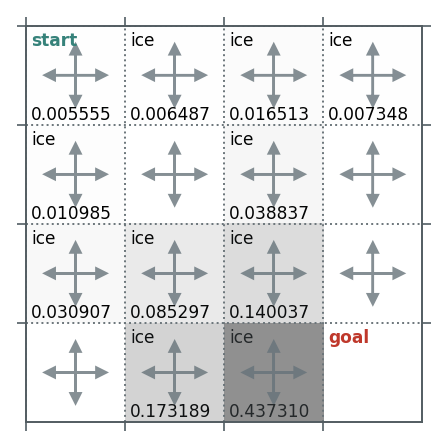

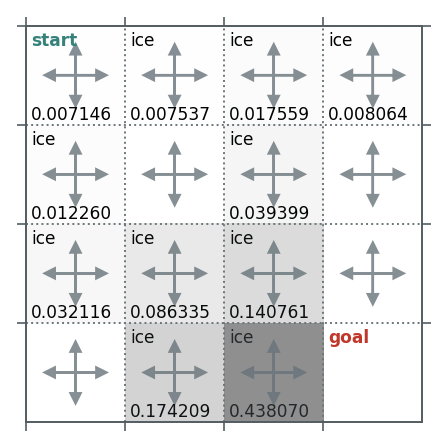

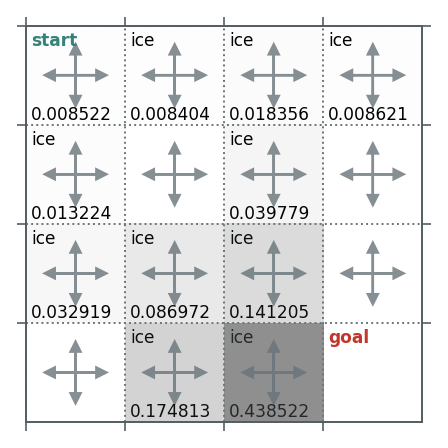

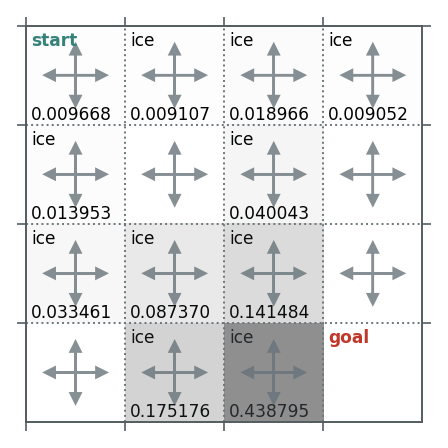

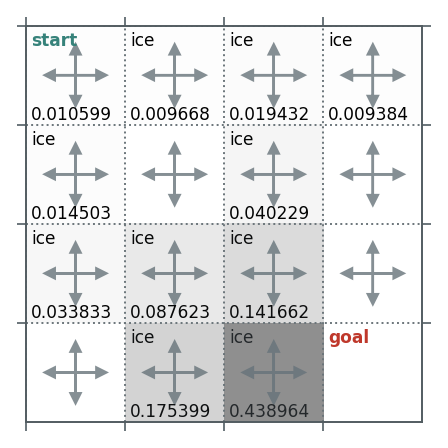

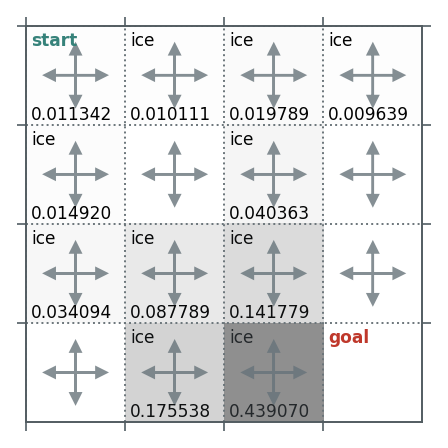

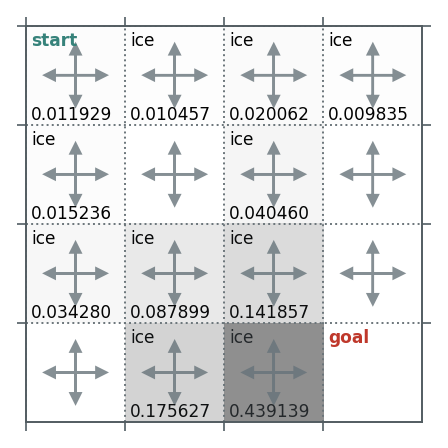

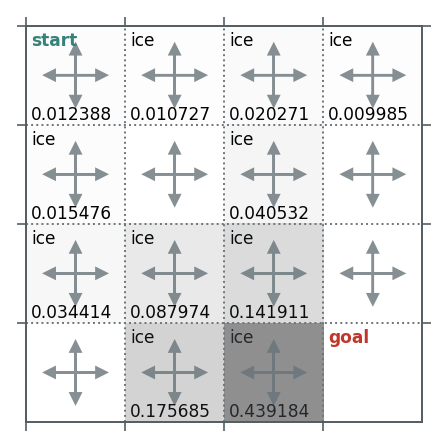

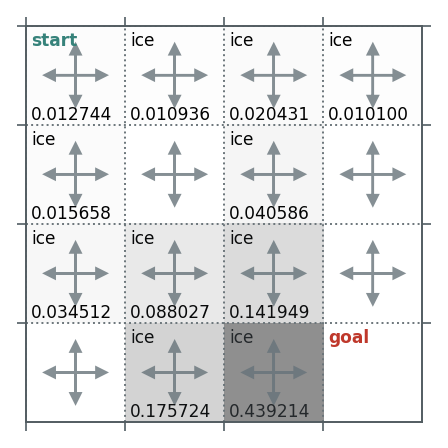

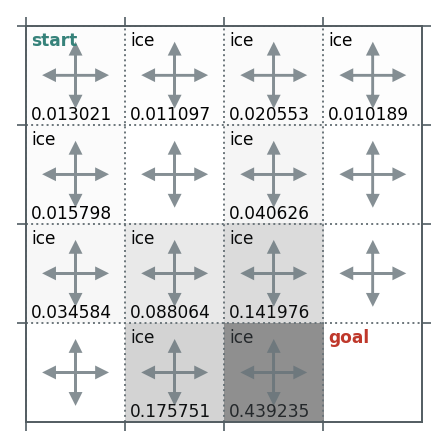

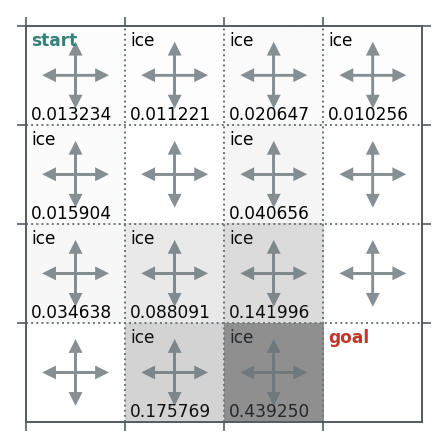

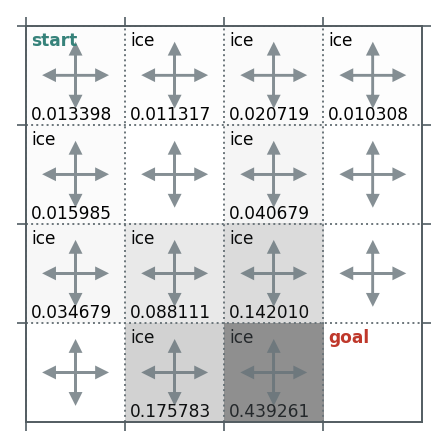

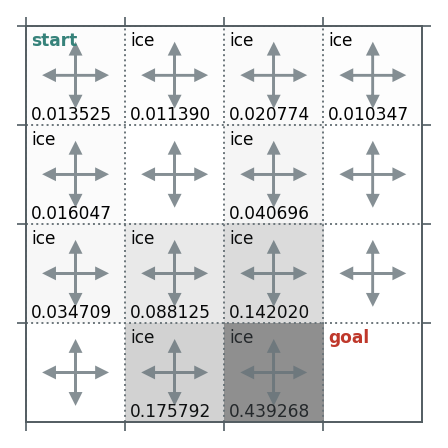

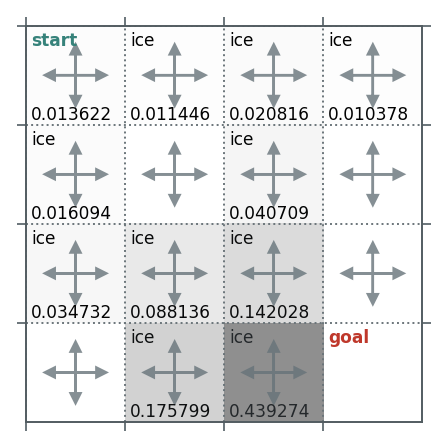

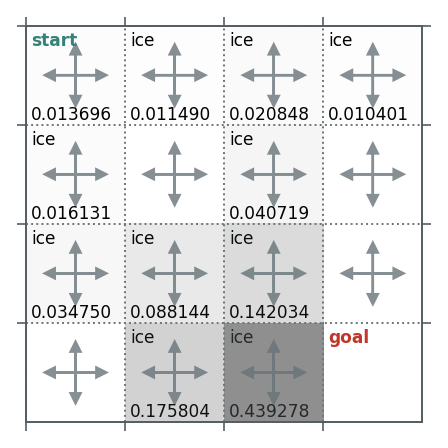

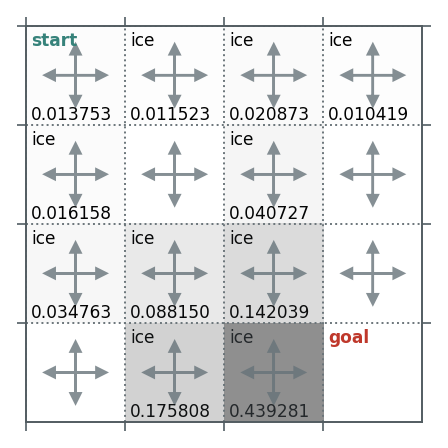

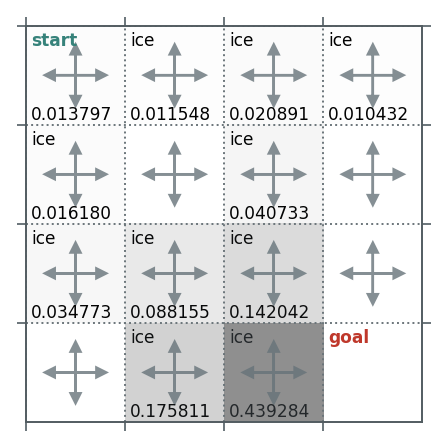

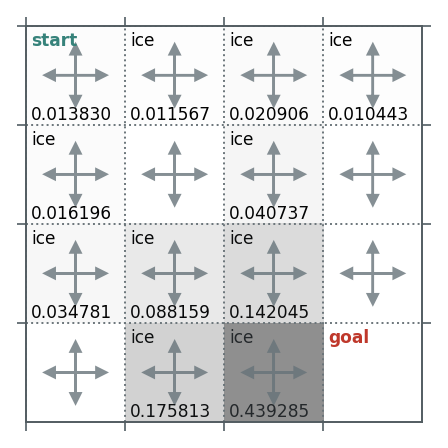

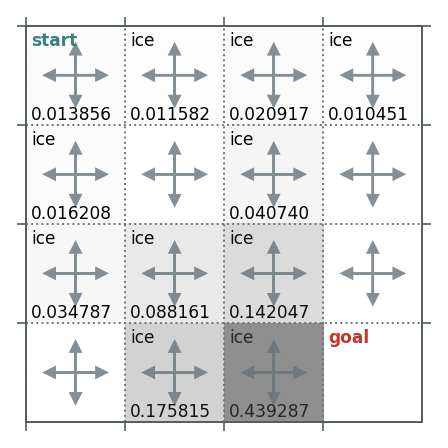

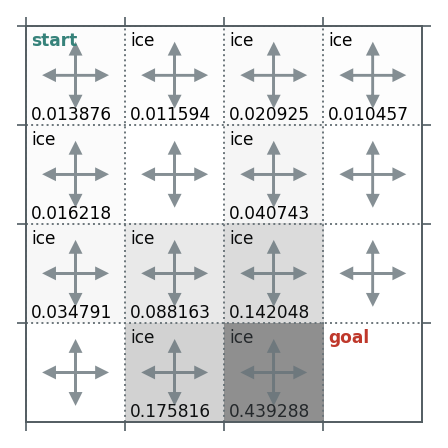

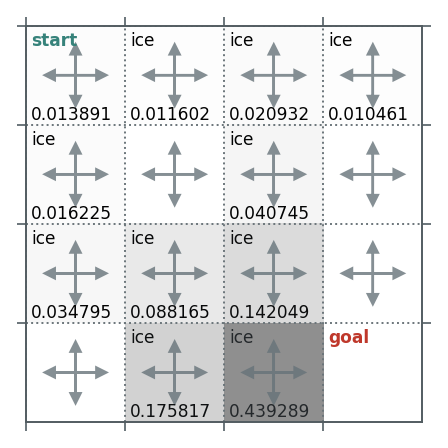

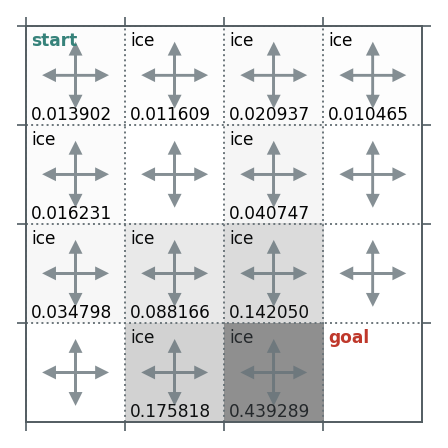

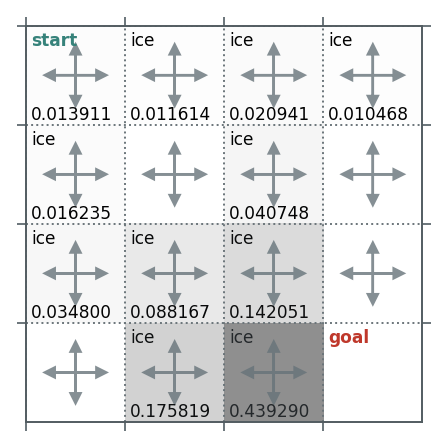

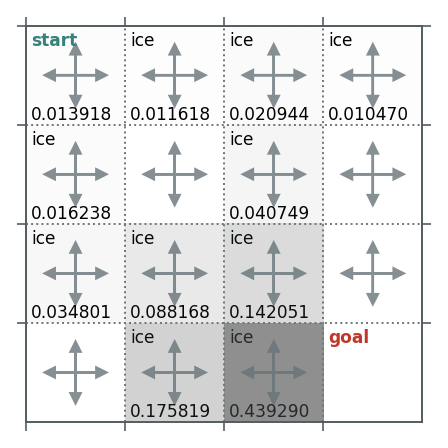

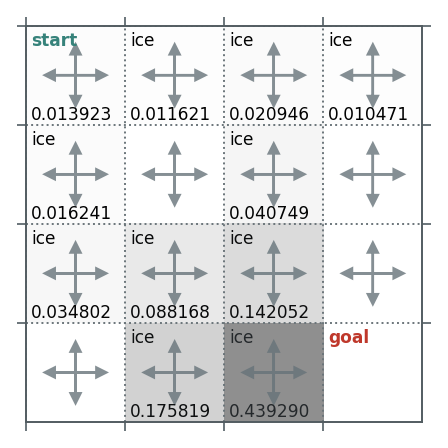

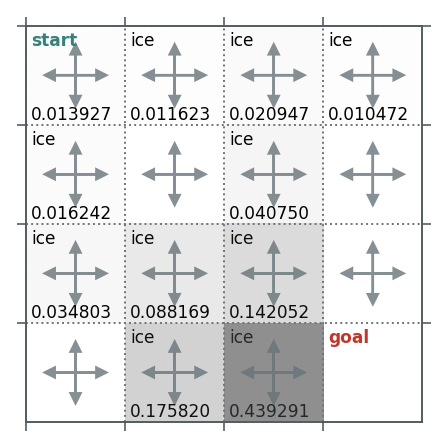

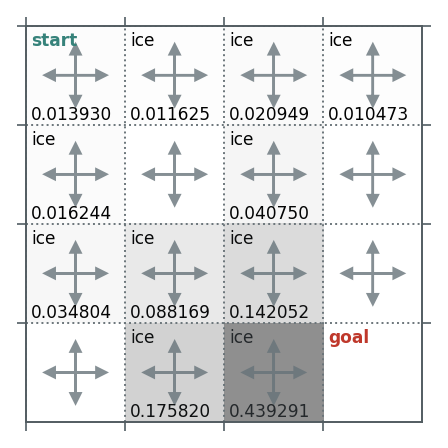

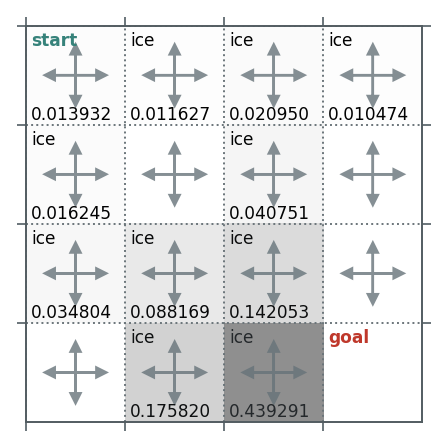

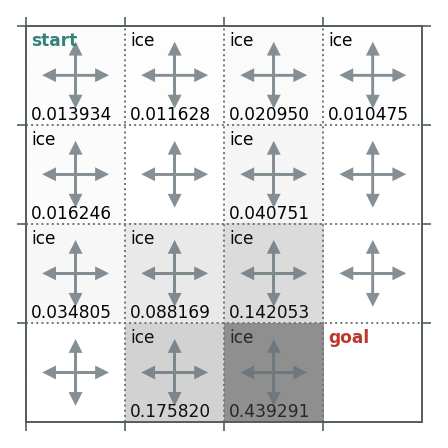

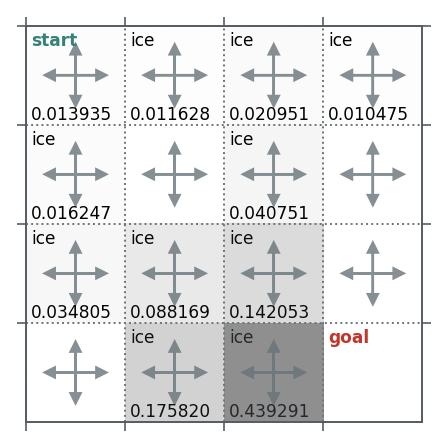

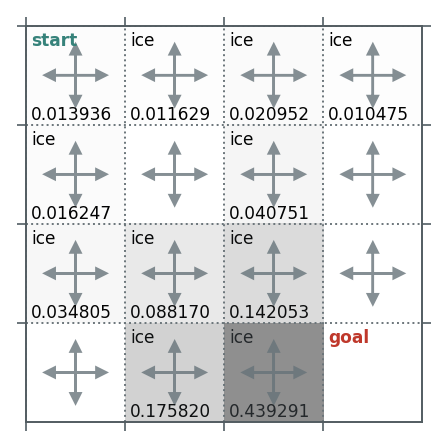

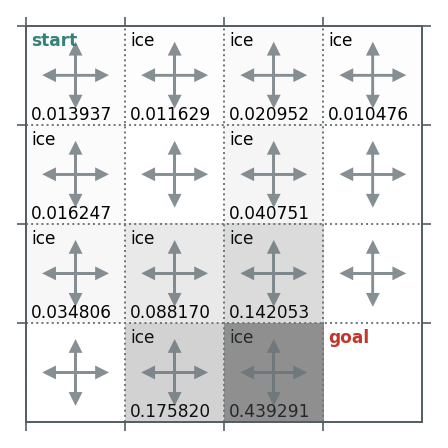

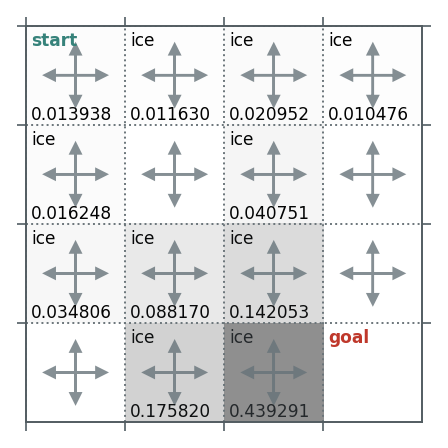

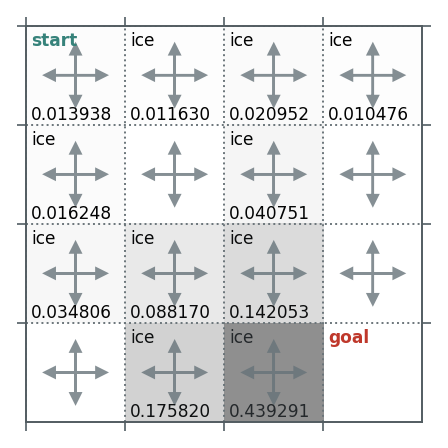

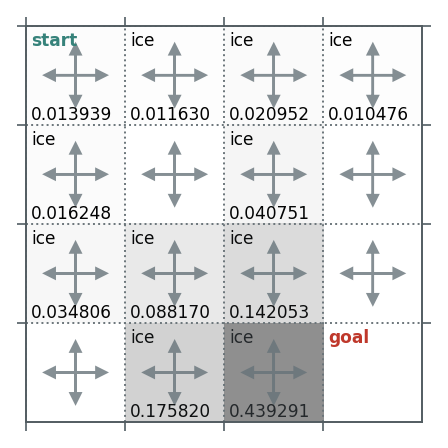

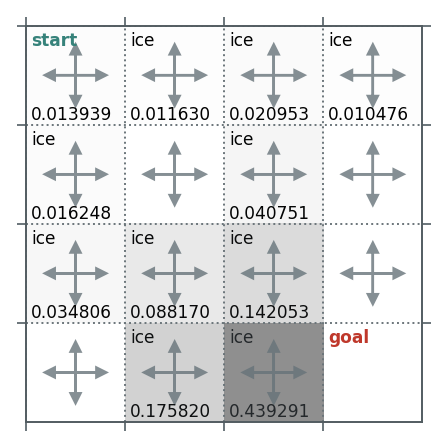

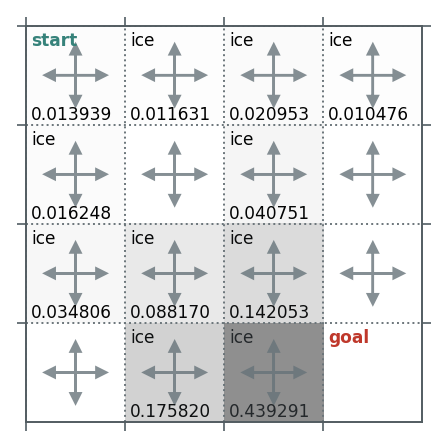

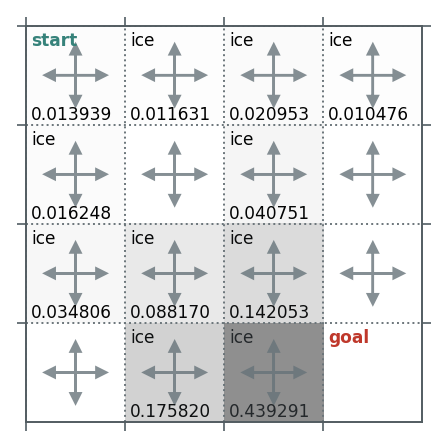

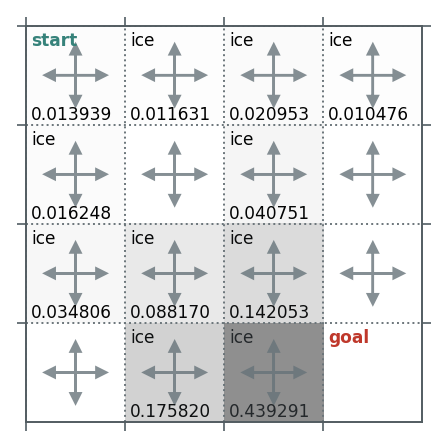

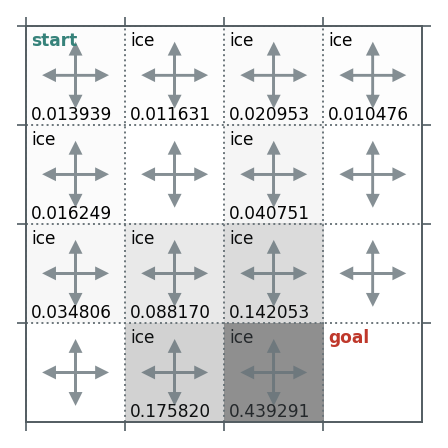

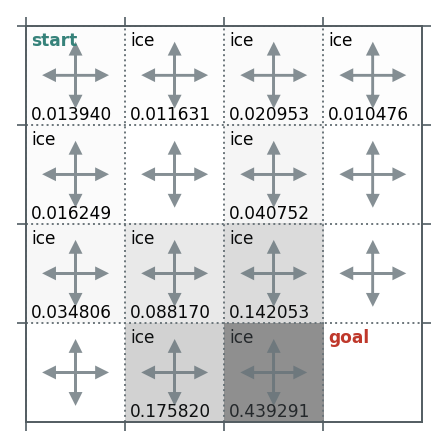

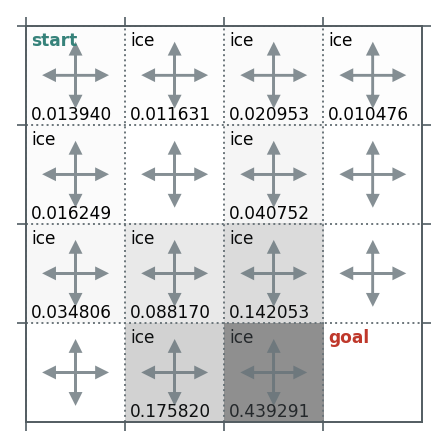

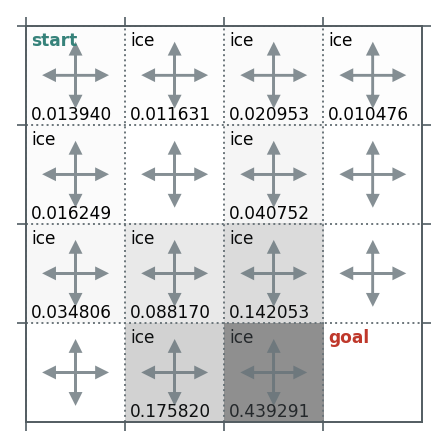

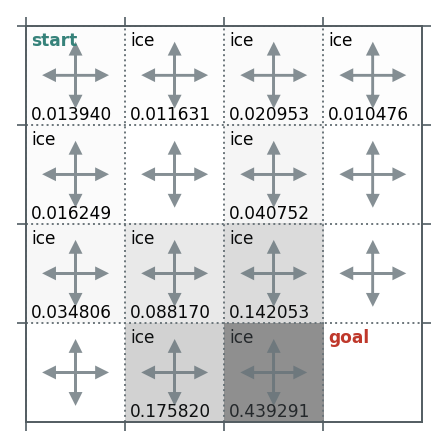

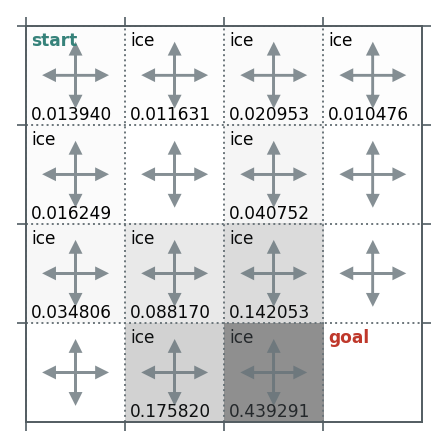

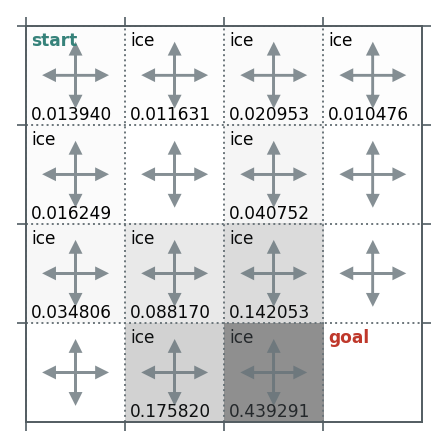

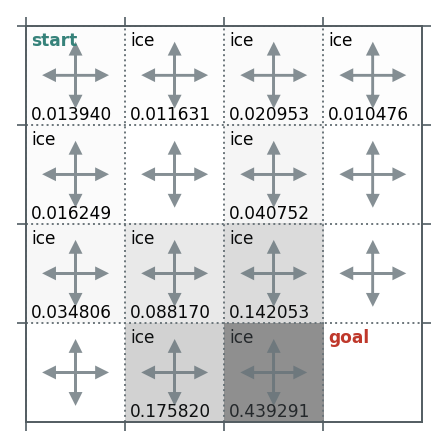

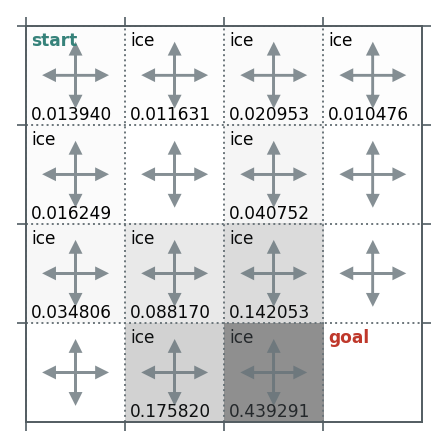

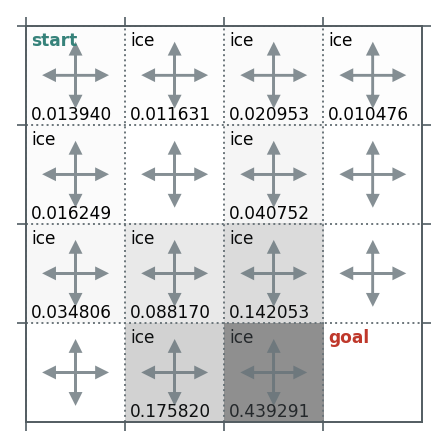

[0.01393977 0.01163091 0.02095297 0.01047648 0.01624865 0.
 0.04075153 0.         0.03480619 0.08816993 0.14205316 0.
 0.         0.17582037 0.43929118 0.        ]


In [35]:
V = policy_evaluation(env, policy)
print(V)